<a href="https://colab.research.google.com/github/PolinaSushko/Machine-Learning/blob/main/Sushko_8_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from keras import layers, models
from sklearn.manifold import TSNE

# Автокодувальник без шуму

In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype(np.float32) / 255
x_test  = x_test.astype(np.float32) / 255

x_train = x_train.reshape(-1, 28 * 28)
x_test  = x_test.reshape(-1, 28 * 28)

input_layer = layers.Input(shape = (784,))

In [4]:
# Енкодер з регуляризацією
encoded = layers.Dense(128, activation = 'relu')(input_layer)
encoded = layers.BatchNormalization()(encoded)
encoded = layers.Dropout(0.2)(encoded)
encoded = layers.Dense(64, activation = 'relu')(encoded)
encoded = layers.BatchNormalization()(encoded)
encoded = layers.Dropout(0.2)(encoded)
encoded = layers.Dense(32, activation = 'relu')(encoded)

# Декодер
decoded = layers.Dense(64, activation = 'relu')(encoded)
decoded = layers.BatchNormalization()(decoded)
decoded = layers.Dropout(0.2)(decoded)
decoded = layers.Dense(128, activation = 'relu')(decoded)
decoded = layers.BatchNormalization()(decoded)
decoded = layers.Dropout(0.2)(decoded)
decoded = layers.Dense(784, activation = 'sigmoid')(decoded)


autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [5]:
history = autoencoder.fit(x_train, x_train, epochs = 70, batch_size = 256, shuffle = True,
                          validation_data = (x_test, x_test)
)

decoded_images = autoencoder.predict(x_test)

Epoch 1/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - loss: 0.5530 - val_loss: 0.1799
Epoch 2/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.1865 - val_loss: 0.1514
Epoch 3/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1694 - val_loss: 0.1414
Epoch 4/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1617 - val_loss: 0.1346
Epoch 5/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1567 - val_loss: 0.1296
Epoch 6/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1531 - val_loss: 0.1261
Epoch 7/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1501 - val_loss: 0.1229
Epoch 8/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1477 - val_loss: 0.1204
Epoch 9/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1461 - val_loss: 0.1182
Epoch 10/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1445 - val_loss: 0.1167
Epoch 11/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1433 - val_loss: 0.1152
Epoch 12/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/s

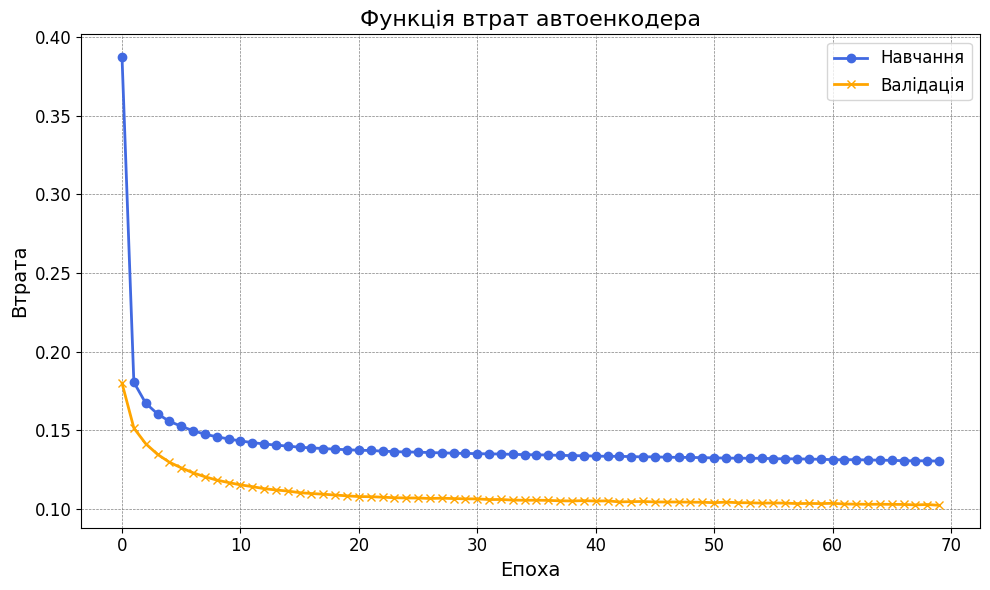

In [6]:
# Візуалізація функції втрат
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label = 'Навчання', color = 'royalblue', linewidth = 2, marker = 'o', markersize = 6)
plt.plot(history.history['val_loss'], label = 'Валідація', color = 'orange', linewidth = 2, marker = 'x', markersize = 6)

plt.title('Функція втрат автоенкодера', fontsize = 16)
plt.xlabel('Епоха', fontsize = 14)
plt.ylabel('Втрата', fontsize = 14)
plt.legend(fontsize = 12)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.tight_layout()
plt.show()

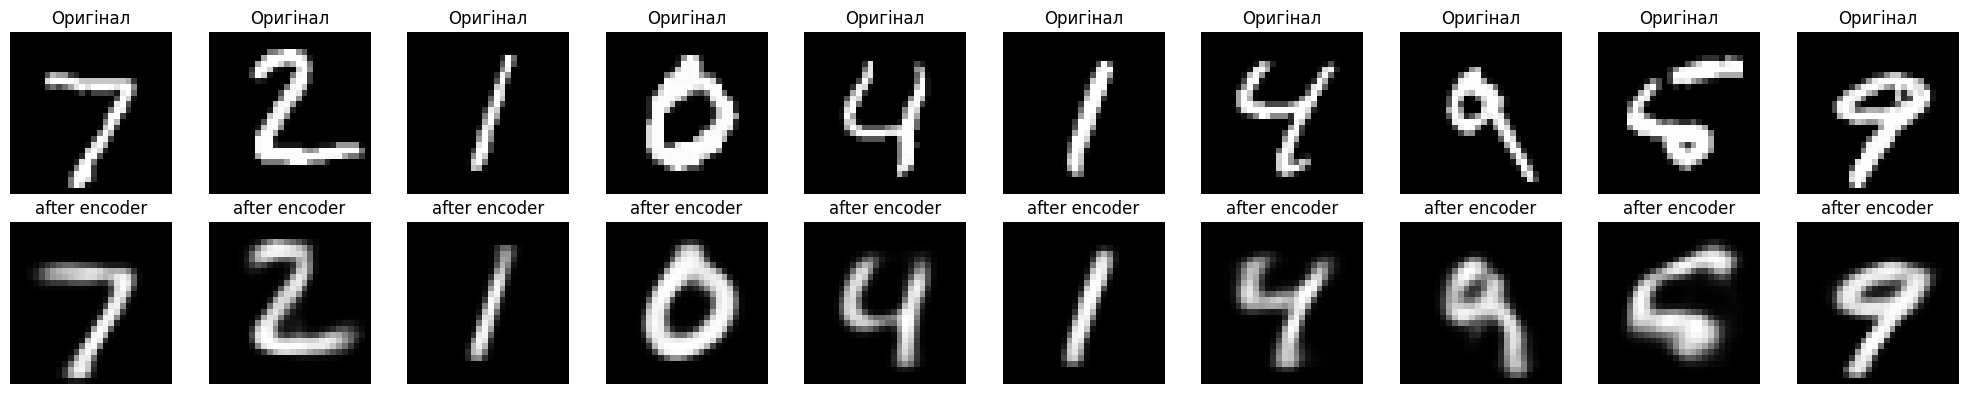

In [7]:
num_images = 10
plt.figure(figsize = (20, 4))

for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap = 'gray')
    plt.title("Оригінал")
    plt.axis('off')

    plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(decoded_images[i].reshape(28, 28), cmap = 'gray')
    plt.title("after encoder")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Автокодувальник із шумом

In [8]:
# Додавання шуму
def add_noise(images, noise_factor = 0.5):
    noisy_images = images + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = images.shape)
    return np.clip(noisy_images, 0., 1.)

x_train_noisy = add_noise(x_train)
x_test_noisy  = add_noise(x_test)

In [9]:
history = autoencoder.fit(x_train_noisy, x_train, epochs = 30, batch_size = 256, shuffle = True,
                          validation_data = (x_test_noisy, x_test)
)

decoded_imgs_noisy = autoencoder.predict(x_test_noisy)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1570 - val_loss: 0.1273
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1485 - val_loss: 0.1239
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1473 - val_loss: 0.1235
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1470 - val_loss: 0.1236
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1464 - val_loss: 0.1233
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1470 - val_loss: 0.1231
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1465 - val_loss: 0.1236
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1464 - val_loss: 0.1234
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1465 - val_loss: 0.1233
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1461 - val_loss: 0.1235
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1460 - val_loss: 0.1231
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

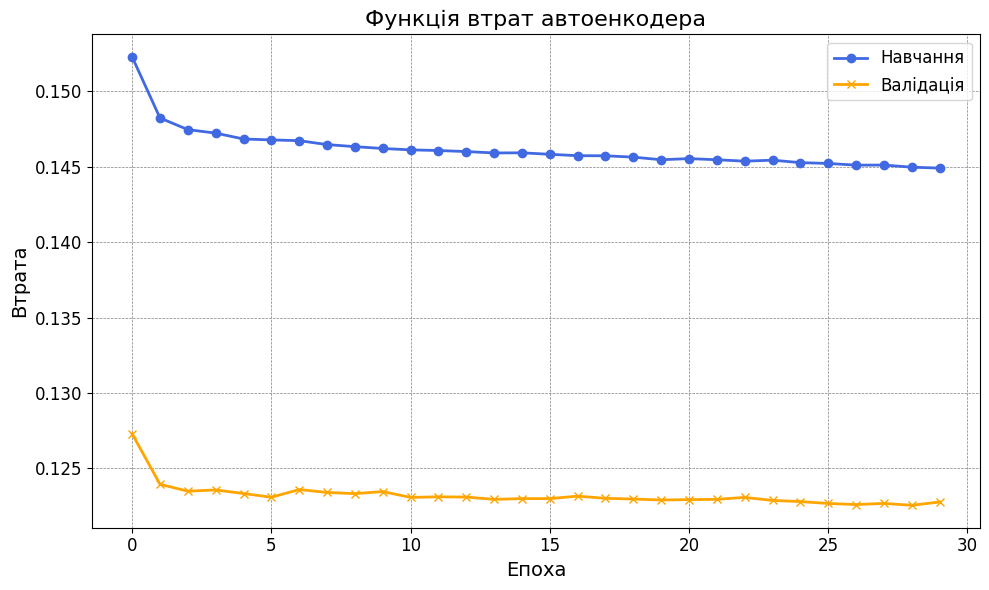

In [11]:
# Візуалізація функції втрат
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label = 'Навчання', color = 'royalblue', linewidth = 2, marker = 'o', markersize = 6)
plt.plot(history.history['val_loss'], label = 'Валідація', color = 'orange', linewidth = 2, marker = 'x', markersize = 6)

plt.title('Функція втрат автоенкодера', fontsize = 16)
plt.xlabel('Епоха', fontsize = 14)
plt.ylabel('Втрата', fontsize = 14)
plt.legend(fontsize = 12)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.tight_layout()
plt.show()

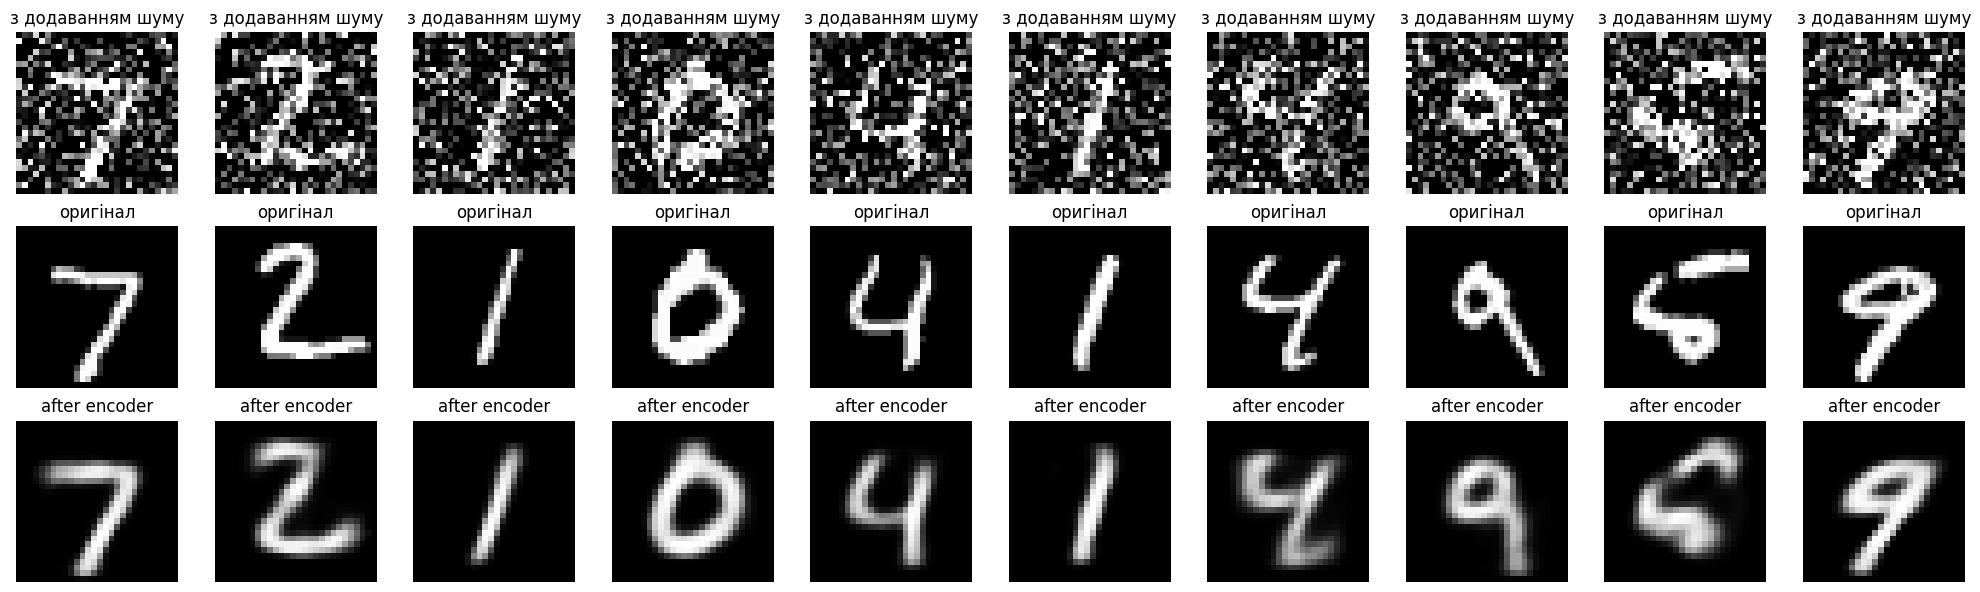

In [12]:
num_images = 10
plt.figure(figsize = (20, 6))

for i in range(num_images):
    plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap = 'gray')
    plt.title(f"з додаванням шуму")
    plt.axis('off')

    plt.subplot(3, num_images, i + 1 + num_images)
    plt.imshow(x_test[i].reshape(28, 28), cmap = 'gray')
    plt.title("оригінал")
    plt.axis('off')

    plt.subplot(3, num_images, i + 1 + 2*num_images)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28), cmap = 'gray')
    plt.title("after encoder")
    plt.axis('off')

plt.tight_layout()
plt.show()

Втрати на навчальних даних 0.145-0.150 і валідаційних даних 0.120-0.125 вказують на те, що модель працює досить добре.

# Розподіл векторів прихованого шару

In [13]:
h = autoencoder.predict(x_test)

h_reduced = TSNE(n_components = 2, random_state = 42).fit_transform(h) # Зменшення розмірності

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


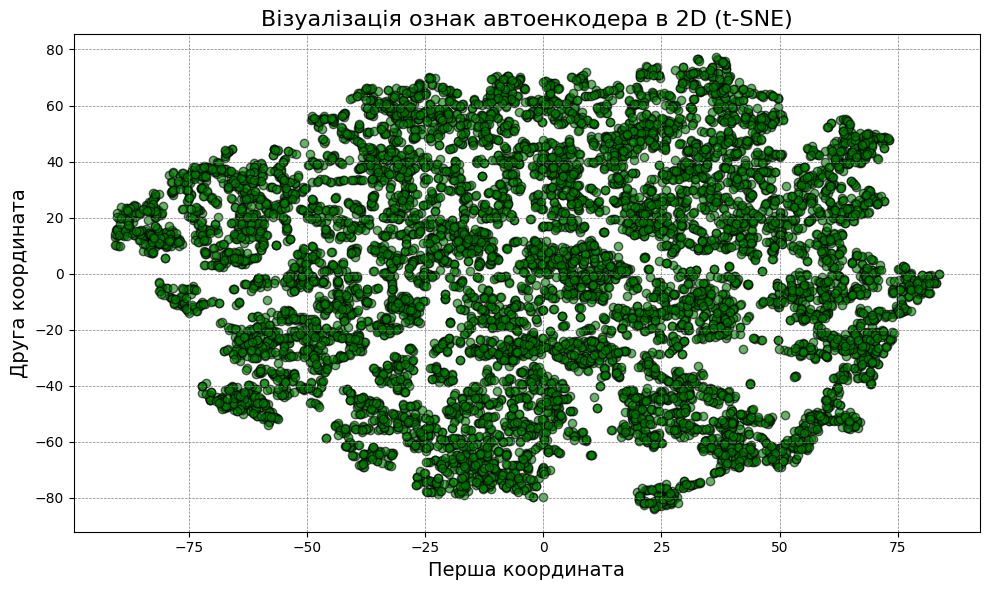

In [14]:
# Візуалізація 2D розподілу ознак

plt.figure(figsize = (10, 6))
plt.scatter(h_reduced[:, 0], h_reduced[:, 1], alpha = 0.6, color = 'green', edgecolor = 'k')
plt.title('Візуалізація ознак автоенкодера в 2D (t-SNE)', fontsize = 16)
plt.xlabel('Перша координата', fontsize = 14)
plt.ylabel('Друга координата', fontsize = 14)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()

# Висновок

Модель показала високу ефективність у відновленні зображень, навіть при додаванні шуму, що свідчить про її стійкість та здатність навчатися складним представленням даних.





